Some notes I found so far - 

The variable major has a lot of categories present in them. A good percentage of the categories have a frequency of less than 10. There are also categories that are the same but are differentiated by lower case, upper case letters and abbreviations. We can deal with the case sensitive categories easily. However any idea how we can deal with the abbreviations.
Also is it useful to group all low frequency categories into one category. I have done this, however this along with the presence of missing values in the variable skews it. 

Target class could be computed by DASS guide -
https://www.psytoolkit.org/survey-library/depression-anxiety-stress-dass.html

Severites of depression, anxiety and stress are categorized to:
-	0 - Normal
-	1 - Mild
-	2 - Moderate
-	3 - Severe
-	4 - Extremely severe

Meaning | Depression | Anxiety | Stress
:---|:---|:---|:---
Normal | 0-9 | 0-7 | 0-14
Mild | 10-13 | 8-9 | 15-18
Moderate | 14-20 | 10-14 | 19-25
Severe | 21-27 | 15-19 | 26-33
Extremely severe | 28+ | 20+ | 34+

Some more detail on the data:
- There are 42 questions in the survey. 
- Q1A holds the answer to Question 1. 
- Q1E holds the elapse time in milliseconds to answer that question. 
- Q1I holds that question's position in the survey.
- introelapse is the time spent on the introduction/landing page (in seconds)
- testelapse is time spent on all the DASS questions (should be equivalent to the time elapsed on all the indiviudal questions combined)
- surveyelapse is the time spent answering the rest of the demographic and survey questions
- TIPI1 through TIPI10 match up to personality as administered (see Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.):

TIPI number | What it means
:---|:---
TIPI1 | Extraverted, enthusiastic.
TIPI2 | Critical, quarrelsome.
TIPI3 | Dependable, self-disciplined.
TIPI4 | Anxious, easily upset.
TIPI5 | Open to new experiences, complex.
TIPI6 | Reserved, quiet.
TIPI7 | Sympathetic, warm.
TIPI8 | Disorganized, careless.
TIPI9 | Calm, emotionally stable.
TIPI10 | Conventional, uncreative.

The following items were presented as a check-list and subjects were instructed "In the grid below, check all the words whose definitions you are sure you know":

Valid Check | Word
:-----|:---
VCL1 | boat
VCL2 | incoherent
VCL3 | pallid
VCL4 | robot
VCL5 | audible
VCL6 | cuivocal
VCL7 | paucity
VCL8 | epistemology
VCL9 | florted
VCL10 | decide
VCL11 | pastiche
VCL12 | verdid
VCL13 | abysmal
VCL14 | lucid
VCL15 | betray
VCL16 | funny

A value of 1 is checked, 0 means unchecked. The words at VCL6, VCL9, and VCL12 are not real words and can be used as a validity check.

Field | what the choices were with meaning
:---|:---
education | "How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
urban | "What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)
gender | "What is your gender?", 1=Male, 2=Female, 3=Other
engnat | "Is English your native language?", 1=Yes, 2=No
age | "How many years old are you?"
hand | "What hand do you use to write with?", 1=Right, 2=Left, 3=Both
religion | "What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other
orientation | "What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other
race | "What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other
voted | "Have you voted in a national election in the past year?", 1=Yes, 2=No
married | "What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married
familysize | "Including you, how many children did your mother have?"
major | "If you attended a university, what was your major (e.g. "psychology", "English", "civil engineering")?"

The following values were derived from technical information:
- country - ISO country code of where the user connected from
- screensize 1=device with small screen (phone, etc), 2=device with big screen (laptop, desktop, etc)
- uniquenetworklocation 1=only one survey from user's specific network in dataset, 2=multiple surveys submitted from the network of this user (2 does not necessarily imply duplicate records for an individual, as it could be different students at a single school or different memebers of the same household; and even if 1 there still could be duplicate records from a single individual e.g. if they took it once on their wifi and once on their phone)
- source how the user found the test, 1=from the front page of the site hosting the survey, 2=from google, 0=other or unknown

Each of the 42 questions is scored on a 4-point scale ranging from 0 (“Did not apply to me at all”) to 3 (“Applied to me very much, or most of the time”). Scores for Depression, Anxiety and Stress are calculated by summing the scores for the relevant items: Depression: 3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42 Anxiety: 2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41 Stress: 1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39

Recommend removing the following columns:
- introelapse 
- testelapse 
- surveyelapse 
- screensize 
- uniquenetworklocation 
- source 
- all of the "E"s for the questions
- possibly the "I"s for the questions unless we think position of the question matters
- possibly all of the VCL columns unless we can figure out if there is anything of value there

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        hold_i = i + 1
        plt.subplot(nGraphRow, nGraphPerRow, hold_i)
        #plt.subplot(nGraphRow,sharex=True)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna() # drop all NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
df = pd.read_csv('../../during_class_work/data.csv', sep=r'\t', engine='python')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [7]:
df.info

<bound method DataFrame.info of        Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1

In [8]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

In [9]:
df['country'].value_counts()

MY    21605
US     8207
GB     1180
CA      978
ID      884
      ...  
UZ        1
AM        1
AF        1
IM        1
VC        1
Name: country, Length: 145, dtype: int64

In [10]:
df['major'].value_counts()

English                         1163
Psychology                      1127
Accounting                       786
Business                         756
Engineering                      751
                                ... 
creative media                     1
PPE                                1
international communication        1
Dentistry or food technology       1
computer sciece                    1
Name: major, Length: 4647, dtype: int64

In [43]:
df.dataframeName = 'data.csv'

In [11]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)


major      11407
country        2
dtype: int64

In [12]:
df['major'].replace(np.NaN,"NA",inplace=True)

In [13]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)


country    2
dtype: int64

In [14]:
df['major'].value_counts()

NA                              11407
English                          1163
Psychology                       1127
Accounting                        786
Business                          756
                                ...  
creative media                      1
PPE                                 1
international communication         1
Dentistry or food technology        1
computer sciece                     1
Name: major, Length: 4648, dtype: int64

There are 4,648 different majors - need to combine some. Let's see if we can see what they all are.

In [15]:
grouped = df.groupby('major')
for major,education in grouped:
    print(major)

 Architecture
 Biology
 Business
 Civil
 Communication
 Computer Science
 Criminology
 Culinary arts
 Engineering
 English
 Law enforcement
 administration studies & science politics
 business economics
 civil engineering
 computer science
 law
 medical
 nursing
 secretary
&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1
&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;
&#22810;&#23186;&#39636;&#35373;&#35336;
&#28888;&#22521;
&#304;lahiyat
-
--
---
-nil-
.
/
0
1. Social work, 2. Law
12th arts
18
19
2 majors: Computer science and industrial eng
2D Art
2D animation
3D Animation
3d animation, architecture
75
???
A Teacher
AA
AADT
ACCA
ACCA Professional Accounting Qualification
ACCOUNT
ACCOUNTANCY
ACCOUNTANT
ACCOUNTING
ACCOUNTS
ACTUARIAL SCIENCES
ADMIN
ADMINISTRATION
ADMINISTRATIVE
AGRICULTURAL
AGRICULTURE
ALAM marine engineering
AMERICAN SIGN LANGUAGE INTERPRETING, COMMUNIT
ANIMAL SCIENCE
ARCHITECTURE
ART
ART & DESIGN
ARTS
ARTS MANAGEMENT
Acc
Acc maybe
Acca
Accaountant
Accontancy
Acconting degree

Theology and philosophy
Theology and religion
Theoretical Linguistics; Spanish Language, Li
Theoretical Physics
Therapeutic Recreation
Therapy
Thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a
Touri Management
Tourism
Tourism Management
Tourism Planning
Tourism Planning and Hospitality Management
Tourism and recreation
Tourism in Management
Tourism management
Tourism planning and hospitality management
Tourism studies
Tourisn
Town Planning
Town Planning and Regional
Town and regional planning
Town planner
Town planning
Trade policies
Trades
Traditional & complementary medicine
Trained Teachers Certificate
Transformative Studies
Translation
Translation studies / Education
Translation&Interpreting
Transport
Transportation and logistics
Transportstion managament
Travel
Travel & Tourism
Traveling
Ultrasonography
Undecided
Undeclared
Undeclared trash
Undeclares
University of Suffolk
Unknown
Urban Design
Urban Planner Engineering
Urban Planning
Urban and Regional Planning
Urban and Regional Plann

In [16]:
def condition(title):
    if 'busin' in str(title).lower() or 'manage' in str(title).lower() or 'Buss' in str(title) or 'Bisness' in str(title) or 'Manag' in str(title) or 'buis' in str(title) or 'Entrepreneur' in str(title) or 'entrepr' in str(title).lower() or 'managment' in str(title).lower() or 'Buis' in str(title) or 'Busni' in str(title) or 'Mana' in str(title) or 'buss' in str(title).lower() or 'Bi' in str(title) or 'Mgt' in str(title) or 'MBA' in str(title) or 'Mgmt' in str(title) or 'MD' in str(title):
        return 'Business/Management'
    elif 'information technology' in str(title).lower() or 'IT' in str(title) or 'it' in str(title):
        return 'I.T.'
    elif 'math' in str(title).lower() or 'LOGISTICS' in str(title) or 'st' in str(title).lower() or 'marh' in str(title).lower() or 'Mate' in str(title):
        return 'Mathematics'
    elif 'computer' in str(title).lower():
        return 'I.T.'
    elif 'bio' in str(title).lower() or 'Plant' in str(title) or 'plant' in str(title).lower() or 'Micro' in str(title):
        return 'Biology'
    elif 'tesl' in str(title).lower() or 'TES' in str(title) or 'Teso' in str(title) or 'Enhlish' in str(title):
        return 'English'
    elif 'account' in str(title).lower() or 'Accoun' in str(title) or 'Acc' in str(title) or 'acc' in str(title).lower() or 'Acouunt' in str(title) or 'Acvount' in str(title) or 'Count' in str(title) or 'Bookke' in str(title):
        return 'Accounting'
    elif 'CA' in str(title):
        return 'CA'
    elif 'none' in str(title).lower() or '0' in str(title) or  '_' in str(title) or '.' in str(title) or 'Nine' in str(title) or '19' in str(title) or 'NA' in str(title):
        return 'No Degree'
    elif 'nurs' in str(title).lower() or 'BSN' in str(title):
        return 'Nursing'
    elif '-' in str(title).lower() or 'NIL' in str(title):
        return 'No Degree'
    elif 'teach' in str(title).lower() or 'Lect' in str(title) or 'eet' in str(title).lower():
        return 'Teaching'
    elif 'pharma' in str(title).lower() or 'medic' in str(title).lower() or 'med' in str(title).lower() or 'hospi' in str(title).lower() or 'Mwdicine' in str(title) or 'Farmacy' in str(title) or 'Pharacology' in str(title) or 'farmasi' in str(title).lower() or 'Farmasy' in str(title) or 'midwi' in str(title).lower() or 'Pathol' in str(title) or 'epide' in str(title).lower() or 'viro' in str(title).lower() or 'clinic' in str(title).lower():
        return 'Pharmacy/Medical'
    elif 'doctor' in str(title).lower() or  'MBBS' in str(title) or 'Mbbs' in str(title) or 'Surge' in str(title) or 'surge' in str(title) or 'mbbs' in str(title).lower()or 'dermat' in str(title).lower() or 'Podiat' in str(title) :
        return 'Doctor'
    elif 'no' in str(title).lower() or 'Undec' in str(title) or 'Idk' in str(title) or 'idk' in str(title).lower() or 'Hahaha' in str(title) or 'never' in str(title).lower() or 'T' in str(title) or 'Good' in str(title):
        return 'No Degree'
    elif 'film' in str(title).lower() or 'Cinema' in str(title) or 'fil' in str(title).lower() or 'Adver' in str(title) or 'adver' in str(title) or 'Act' in str(title) or 'Enter' in str(title) or 'digital' in str(title).lower() or 'cinema' in str(title).lower() or 'Video' in str(title) or 'Direct' in str(title) or 'Theat' in str(title) or 'Radio' in str(title) or 'theat' in str(title).lower() or 'drama' in str(title).lower():
        return 'Media'
    elif 'international' in str(title).lower() or 'Internatianal' in str(title):
        return 'International Relations'
    elif 'human' in str(title).lower() or 'hr' in str(title).lower() or 'Hs' in str(title) or 'Hm' in str(title) or 'Humam' in str(title):
        return 'Human Resources'
    elif 'art' in str(title).lower() or 'Painting' in str(title) or 'Drawing' in str(title) or 'ba' in str(title) or 'Printing' in str(title) or 'las' in str(title).lower() or 'Ma' in str(title) or 'paint' in str(title).lower() or 'creative' in str(title).lower() or 'AA' in str(title) or 'BA' in str(title) or 'Sculp' in str(title) or 'Writing' in str(title):
        return 'Arts'
    elif 'islam' in str(title).lower() or 'Muamalat' in str(title) or 'Quran' in str(title) or 'Halal' in str(title) or 'Usul' in str(title) or 'Zakat' in str(title) or 'usul' in str(title).lower():
        return 'Islamic Studies'
    elif 'physio' in str(title).lower() or 'fis' in str(title).lower():
        return 'Physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower() or 'soical' in str(title).lower() or 'Sis' in str(title) or 'Sosio' in str(title) or 'Sicio' in str(title) or 'sosiality' in str(title).lower():
        return 'Sociology'
    elif 'bank' in str(title).lower():
        return 'Banking'
    elif 'Palae' in str(title) or 'Museo' in str(title):
        return 'History'
    elif 'agri' in str(title).lower():
        return 'Agriculture'
    elif 'Market' in str(title) or 'Finan' in str(title) or 'finance' in str(title).lower() or 'MARKETING' in str(title) or 'market' in str(title).lower() or 'retail' in str(title).lower() or 'CMP' in str(title) or 'Merket' in str(title):
        return 'Marketing/Finance'
    elif 'counsel' in str(title).lower() or 'cauns' in str(title) or 'Kaunseling' in str(title) or 'kaunseling' in str(title) or 'Caunsel' in str(title) or 'Counsel' in str(title) or 'Cousel' in str(title):
        return 'Counselling'
    elif 'programming' in str(title).lower() or 'coding' in str(title).lower() or 'Ibm' in str(title) or 'ceit' in str(title) or 'Hacking' in str(title):
        return 'I.T.'
    elif 'civil' in str(title).lower() or 'comp' in str(title).lower() or 'Mechanical' in str(title) or 'Electrical' in str(title) or 'Mechatronics' in str(title) or 'Eee' in str(title) or 'cs' in str(title).lower() or 'mecha' in str(title) or 'Chemical' in str(title) or 'chemical' in str(title) or 'tech' in str(title) or 'ec' in str(title).lower() or 'egineering' in str(title).lower() or 'manufacturing' in str(title).lower():
        return 'Engineering'
    elif 'ict' in str(title).lower() or 'developer' in str(title).lower() or 'I.T' in str(title) or 'CAE&D' in str(title) or 'It' in str(title):
        return 'I.T.'
    elif 'commu' in str(title).lower() or 'comm' in str(title).lower() or 'com' in str(title).lower() or 'Conmunication' in str(title):
        return 'Communications'
    elif 'administration' in str(title).lower() or 'admin' in str(title).lower():
        return 'Administration'
    elif 'psycho' in str(title).lower() or 'psy' in str(title).lower() or 'Clinical osychology' in str(title) or 'hschology' in str(title) or 'Pysch' in str(title) or 'pys' in str(title).lower() or 'Pych' in str(title) or 'pscy' in str(title) or 'payc' in str(title).lower() or 'Phyc' in str(title) or 'psicologia' in str(title) or 'Phsychology' in str(title) or 'Phichology' in str(title) or 'psuchology' in str(title) or 'Pschology' in str(title) or 'psikologi' in str(title).lower():
        return 'Psychology'
    elif 'english' in str(title).lower() or 'Elglish' in str(title) or 'esl' in str(title).lower() or 'Emg' in str(title) or 'emglisj' in str(title).lower():
        return 'English'
    elif 'law' in str(title).lower() or 'BBA' in str(title) or 'llb' in str(title) or 'lew' in str(title).lower() or 'kaw' in str(title).lower() or 'enforcement' in str(title).lower() or 'Kaw' in str(title):
        return 'Law'
    elif 'engineering' in str(title).lower() or 'engi' in str(title).lower() or 'eng' in str(title).lower() or 'Software' in str(title) or 'soft' in str(title).lower() or 'mechanical' in str(title).lower() or 'Egineeering' in  str(title) or 'electronic' in str(title).lower() or 'CE' in str(title) or 'mech' in str(title).lower() or 'Ciclvil' in str(title) or 'Eggineering' in str(title) or 'Tech' in str(title) or 'Teol' in str(title) or 'EEE' in str(title) or 'PE' in str(title):
        return 'Engineering'
    elif 'architecture' in str(title).lower() or 'aechitecture' in str(title).lower() or 'archirecture' in str(title).lower() or 'architect' in str(title).lower() or 'Arsitechture' in str(title) or 'Building' in str(title) or 'building' in str(title).lower() or 'Arc' in str(title) or 'builder' in str(title).lower():
        return 'Architecture'
    elif 'design' in str(title).lower() or 'Desig' in str(title) or 'Dssign' in str(title):
        return 'Designer'
    elif 'science' in str(title).lower() or 'Sceince' in str(title) or 'Sci' in str(title) or 'sciene' in str(title) or 'BS' in str(title):
        return 'Pure Sciences'
    elif 'physics' in str(title).lower() or 'Phsyics' in str(title) or 'EMC' in str(title) or 'Physic' in str(title) or 'physi' in str(title):
        return 'Physics'
    elif 'chemistry' in str(title).lower() or 'CIS' in str(title) or 'Chem' in str(title):
        return 'Chemistry'
    elif 'french' in str(title).lower() or 'Fr' in str(title):
        return 'French'
    elif 'religi' in str(title).lower() or 'Relegion' in str(title) or 'Rel' in str(title) or 'Hukum' in str(title) or 'Sains' in str(title) or 'theology' in str(title).lower():
        return 'Religious Studies'
    elif title=='&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;' or title=='&#22810;&#23186;&#39636;&#35373;&#35336;' or title=='nil' or title=='drop out' or title=='&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1' or title=='75' or title=='Secondary education' or title=='Thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a' or title=='18' or title=='ongoing' or title=='&#28888;&#22521;' or title=='lol' or title=='In college currently' or title=='secondary education' or title=='Dropped out' or title=='na' or title=='didnt attend' or title=='im going on the next year. ' or title=='&#304;lahiyat' or title=='lmfao, im 15' or title=='Elem Ed' or title=='yes' or title=='N/a' or title=='/' or title=='???' or title=='cocaine 101' or title=='doesnt matter' or title== 'oooo' or title=='G' or title=='Yes' or title=='Na' or title=='Na 'or title=='Want sure':
        return 'No Degree'
    elif 'Music' in str(title) or 'Dance' in str(title) or 'danc' in str(title).lower() or 'Vocational' in str(title) or 'Muisc' in str(title) or 'music' in str(title).lower() or 'Performance' in str(title) or 'singer' in str(title).lower():
        return 'Music/Dance'
    elif 'pol' in str(title).lower() or 'Govern' in str(title) or 'Right' in str(title):
        return 'Politics'
    elif 'photo' in str(title).lower() or 'Foto' in str(title) or 'Photo' in str(title):
        return 'Photography'
    elif 'Television' in str(title) or 'telev' in str(title).lower():
        return 'Television'
    elif 'bahasa' in str(title).lower() or 'Bahasa' in str(title) or 'Malay' in str(title) or 'malay' in str(title).lower():
        return 'Malaysian languages'
    elif 'Urban' in str(title) or 'Town' in str(title) or 'town' in str(title).lower() or 'planning' in str(title) or 'Plann' in str(title) or 'development' in str(title):
        return 'Economic Developments'
    elif 'Public' in str(title) or 'public' in str(title).lower():
        return 'Public Relations'
    elif 'Writing' in str(title) or 'writing' in str(title).lower() or 'Screenwritinf' in str(title) or 'Author' in str(title):
        return 'Writing/Author'
    elif 'philosophy' in str(title).lower() or 'Phil' in str(title) or 'philos' in str(title).lower() or 'Filo' in str(title) or 'Phylosophy' in str(title):
        return 'Philosophy'
    elif 'Actua' in str(title):
        return 'Acturial Studies'
    elif 'DENTALWORKS' in str(title) or 'dental' in str(title) or 'Dental' in str(title) or 'Odont' in str(title):
        return 'Dentist'
    elif 'beaut' in str(title).lower() or 'Fashion' in str(title) or 'make' in str(title) or 'fashion' in str(title).lower() or 'hair' in str(title).lower() or 'cosmet' in str(title).lower():
        return 'Fashion'
    elif 'Health' in str(title) or 'health' in str(title).lower() or 'wellness' in str(title).lower() or 'Healtcare' in str(title):
        return 'Healthcare'
    elif 'Language' in str(title) or 'lang' in str(title).lower() or 'Laq' in str(title):
        return 'Languages'
    elif 'cook' in str(title).lower() or 'bakery' in str(title).lower() or 'Bak' in str(title) or 'CULINARY' in str(title) or 'Food' in str(title) or 'food' in str(title) or 'chef' in str(title).lower() or 'Cul' in str(title) or 'Patiss' in str(title) or 'culi' in str(title).lower():
        return 'Cooking'
    elif 'Hotel' in str(title) or 'hotel' in str(title).lower() or 'food service' in str(title) or 'cater' in str(title).lower():
        return 'Hotel Management'
    elif 'therapy' in str(title).lower() or 'ot' in str(title).lower() or 'theraphy' in str(title):
        return 'Therapeutical Studies'
    elif 'veter' in str(title).lower() or 'Veter' in str(title) or 'Vet' in str(title) or 'Wildlife' in str(title):
        return 'Veterinary'
    elif 'Survey' in str(title) or 'survey' in str(title) or 'serveyors' in str(title).lower() or 'Qs' in str(title) or 'SURVEYING' in str(title) or 'QS' in str(title) or 'Surver' in str(title):
        return 'Surveyour Studies'
    elif 'Aircraft' in str(title) or 'aircraft' in str(title).lower() or 'aircr' in str(title).lower() or 'aviation' in str(title).lower() or 'Aero' in str(title) or 'navigation' in str(title).lower():
        return 'Aircraft'
    elif 'environment' in str(title).lower() or 'Environment' in str(title) or 'envi' in str(title).lower():
        return 'Environmental Education'
    elif 'Syariah' in str(title) or 'syariah' in str(title):
        return 'Syrian Languages'
    elif 'judicial' in str(title).lower() or 'juri' in str(title).lower() or 'legal' in str(title).lower():
        return 'Law'
    elif 'Liter' in str(title) or 'literature' in str(title) or 'litt' in str(title).lower():
        return 'Literature'
    elif 'child' in str(title).lower() or 'Child' in str(title) or 'Preschool' in str(title) or 'Youth' in str(title):
        return 'Child Education'
    elif 'Tour' in str(title) or 'tour'  in str(title).lower():
        return 'Tourism'
    elif 'Gam' in str(title) or 'game' in str(title).lower():
        return 'Gaming'
    elif 'education' in str(title).lower() or 'Education' in str(title) or 'ed' in str(title).lower() or 'acad' in str(title) or 'Dploma' in str(title) or 'Bach' in str(title) or 'College' in str(title):
        return 'B.Ed or M.Ed'
    elif 'Sport' in str(title) or 'sport' in str(title).lower():
        return 'Sports'
    elif 'Petro' in str(title):
        return 'Petroleum'
    elif 'Journ' in str(title) or 'jour' in str(title).lower() or 'Joun' in str(title) or 'Jurn' in str(title):
        return 'Journalism'
    elif 'Mandarin' in str(title):
        return 'Chinese/Mandarin Languages'
    elif 'Electrician' in str(title):
        return 'Skilled Trade'
    elif 'Network' in str(title) or 'network' in str(title).lower():
        return 'Networking'
    elif 'geo' in str(title).lower() or 'GEO' in str(title):
        return 'Geography'
    elif 'Librarian' in str(title) or 'lib' in str(title).lower():
        return 'Librarian'
    elif 'Mission' in str(title) or 'mission' in str(title).lower():
        return 'Missionary Studies'
    elif 'Forensic' in str(title) or 'foren' in str(title).lower() or 'Crime' in str(title) or 'crim' in str(title).lower():
        return 'Forensic/Criminal studies'
    elif 'Animation' in str(title) or 'animation' in str(title).lower() or 'imag' in str(title) or 'graphic' in str(title) or 'Graphic' in str(title) or 'Cretive' in str(title):
        return 'Animations'
    elif 'aqua' in str(title).lower() or 'Aqu' in str(title):
        return 'Aquaculture'
    elif 'soldier' in str(title).lower() or 'lwa' in str(title).lower() or 'defence' in str(title):
        return 'Army'
    elif 'Kinesi' in str(title) or 'kines' in str(title).lower() or 'hod' in str(title):
        return 'Human Kinetics'
    elif 'Horti' in str(title) or 'horti' in str(title) or 'Landscape' in str(title):
        return 'Horticulture'
    elif 'commerce' in str(title).lower() or 'Coome' in str(title):
        return 'Commerce'
    elif 'Speech' in str(title) or 'speech' in str(title).lower():
        return 'Speech Pathology'
    elif 'SECRET' in str(title) or 'secret' in str(title).lower():
        return 'Secretary'
    elif 'Animals' in str(title) or 'animal' in str(title).lower() or 'Pet' in str(title):
        return 'Animal Care'
    elif 'Organisation' in str(title) or 'organi' in str(title).lower():
        return 'Organizational Behaviour'
    elif 'event' in str(title).lower() or 'Event' in str(title):
        return 'Event Managment'
    elif 'radiology' in str(title).lower() or 'Radiography' in str(title) or 'radiograpghy' in str(title).lower() or 'Radiation' in str(title) or 'radiography' in str(title):
        return 'Radiography'
    elif 'nutrition' in str(title).lower() or 'Nutrition' in str(title):
        return 'Nutritionist'
    elif 'Audit' in str(title) or 'audit' in str(title).lower():
        return 'Auditing'
    elif 'Neuro' in str(title) or 'neuroligy' in str(title).lower():
        return 'Neurology'
    elif 'Anato' in str(title) or 'anat' in str(title).lower():
        return 'Anatomy'
    elif 'trade' in str(title).lower():
        return 'Trading'
    elif 'Interpre' in str(title) or 'translation' in str(title).lower():
        return 'Interpreter'
    elif 'audio' in str(title).lower() or 'Audio' in str(title):
        return 'Audiology'
    elif 'insurance' in str(title).lower() or 'Insurance' in str(title):
        return 'Insurances'
    elif 'archaeology' in str(title).lower() or 'archaeology' in str(title).lower() or 'archeology' in str(title).lower() or 'treasury' in str(title):
        return 'Archeology'
    elif 'SERV'in str(title) or 'service' in str(title).lower():
        return 'Service Training'
    elif 'GERMAN' in str(title) or 'german' in str(title).lower():
        return 'German'
    elif 'KOREAN' in str(title) or 'Korea' in str(title):
        return 'Korean'
    elif 'valuat' in str(title).lower() or 'valuer' in str(title).lower():
        return 'Registered Valuer'
    elif 'skil' in str(title).lower() or 'Skill' in str(title) or 'Professional' in str(title) or 'practical' in str(title).lower():
        return 'Skilled Trade'
    elif 'virology' in str(title):
        return 'Virology'
    elif 'lab' in str(title).lower() or 'Lab' in str(title) or 'MLT' in str(title):
        return 'Laboratory Worker'
    elif 'GENERAL' in str(title) or 'General' in str(title):
        return 'General'
    elif 'Opto' in str(title) or 'opto' in str(title).lower() or 'Ophth' in str(title):
        return 'Optometry'
    elif 'Zoo' in str(title) or 'zoo' in str(title).lower():
        return 'Zoology'
    elif 'office' in str(title).lower() or 'Office' in str(title):
        return 'Office Skills'
    elif 'found' in str(title).lower() or 'Found' in str(title):
        return 'Foundation Education'
    elif 'general' in str(title).lower() or 'General' in str(title):
        return 'General Education'
    elif 'real estate' in str(title).lower() or 'property' in str(title).lower():
        return 'Realtor'
    elif 'Meteorology' in str(title) or 'Metrology' in str(title):
        return 'Meterology'
    elif 'operations' in str(title).lower() or 'Operation' in str(title):
        return 'Operational Managment'
    elif 'Merchandising' in str(title) or 'merchand' in str(title).lower():
        return 'Merchandising'
    elif 'Spanish' in str(title):
        return 'Spanish'
    elif 'Nature' in str(title) or 'natur' in str(title).lower():
        return 'Nature Conservation/Resources'
    elif title=='a level ' or title==' ' or title=='a level':
        return 'No Degree'
    elif 'Corporate' in str(title) or 'corporate' in str(title).lower():
        return 'Corporate'
    elif 'greek' in str(title).lower() or 'Greek' in str(title):
        return 'Greek'
    elif 'Behaviour' in str(title) or 'Behavior' in str(title) or 'Organizational Behaviour' in str(title):
        return 'Behaviour Analysis'
    elif 'publish' in str(title).lower():
        return 'Publishing'
    elif 'Safety' in str(title) or 'safety' in str(title).lower():
        return 'Safety Training'
    elif 'genetic' in str(title).lower() or 'Genetic' in str(title):
        return 'Genetics'
    elif 'Dietetic' in str(title):
        return 'Dietician'
    elif 'Production' in str(title) or 'manufacturing' in str(title).lower():
        return 'Production And Manufacturing'
    elif 'Welding' in str(title) or 'hvac' in str(title).lower() or 'maint' in str(title).lower():
        return 'Skilled Trade'
    elif 'Geron' in str(title):
        return 'Gerontology'
    elif 'Research' in str(title) or 'Ph D' in str(title):
        return 'Ph.D'
    elif 'arabic' in str(title).lower() or 'Arabic' in str(title):
        return 'Arabic'

    else:
        return title

df['major'] = df['major'].apply(condition)

In [17]:
df['major'].value_counts()

No Degree                  12706
Engineering                 3868
Business/Management         3220
I.T.                        2572
Mathematics                 2362
                           ...  
portuguese                     1
Corrosion                      1
harvard                        1
Environmental Education        1
Supply chain                   1
Name: major, Length: 135, dtype: int64

In [18]:
grouped = df.groupby('major')
for major,education in grouped:
    print(major)

Accounting
Administration
Afrikaans
Agriculture
Aircraft
Anatomy
Animal Care
Animations
Aquaculture
Arabic
Archeology
Architecture
Army
Arts
Audiology
B.Ed or M.Ed
Banking
Behaviour Analysis
Biology
Business/Management
CA
Cabin Crew
Chargeman
Chemistry
Child Education
Chinese
Commerce
Communications
Cooking
Corporate
Corrosion
Counselling
Crisis intervention
Danish
Dentist
Designer
Dietician
Doctor
Dutch
Economic Developments
Engineering
English
Environmental Education
Event Managment
Fashion
Forensic/Criminal studies
Foundation Education
French
Gaming
General
General Education
Genetics
Geography
German
Gerontology
Gis
Greek
Healthcare
History
Horticulture
Hotel Management
Human Kinetics
Human Resources
I.T.
IR
Information
Insurances
International Relations
Interpreter
Islamic Studies
Japanese
Journalism
Kiin
Korean
Laboratory Worker
Languages
Law
Leadership
Librarian
Malaysian languages
Marketing/Finance
Mathematics
Media
Merchandising
Meterology
Mining
Missionary Studies
Music/Dance


In [27]:
#drop those with 1 value in major - first check to see how many that would be

major_cnt = df.groupby('major').filter(lambda x: (x['major'].count()<5).any())
major_cnt

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
1440,1,11,5097,1,21,3525,1,2,7225,1,...,2,1,2,6,1,60,1,2,2,Operational Managment
3255,1,5,2651,4,25,2290,2,19,3840,4,...,1,1,1,7,1,60,2,1,2,Missionary Studies
3934,2,8,2308,4,39,2550,4,36,4099,1,...,2,1,1,6,1,60,2,2,2,Chemistry
4263,1,29,5209,2,40,3728,1,5,5076,2,...,2,1,3,12,1,60,2,3,1,Army
4755,4,30,5529,2,28,6521,3,26,5233,2,...,1,2,1,10,1,10,2,1,4,Archeology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37247,1,24,6203,1,9,4912,1,31,3995,1,...,1,1,1,10,1,10,1,2,4,Registered Valuer
37584,2,34,7216,1,7,8461,3,1,26176,2,...,1,1,1,2,1,10,1,1,2,Korean
38138,1,15,2408,1,28,2029,1,32,2029,1,...,2,1,1,2,2,60,2,1,2,Chinese
38163,3,7,4797,1,6,4207,2,19,5909,1,...,2,1,1,6,1,60,1,3,2,Gerontology


In [23]:
#df = df.filter(lambda x: (x['major'].count()>1).any())

df=df.groupby('major').filter(lambda x: (x['major'].count()>1).any())


In [24]:
df['major'].value_counts()

No Degree              12706
Engineering             3868
Business/Management     3220
I.T.                    2572
Mathematics             2362
                       ...  
History                    2
Greek                      2
Ph.D                       2
Missionary Studies         2
Meterology                 2
Name: major, Length: 115, dtype: int64

In [26]:
print(major_cnt['major'].value_counts())

Missionary Studies          2
Ph.D                        2
Neurology                   2
Behaviour Analysis          2
General Education           2
Merchandising               2
Leadership                  2
Gis                         2
Organizational Behaviour    2
Genetics                    2
Laboratory Worker           2
Event Managment             2
Registered Valuer           2
Office Skills               2
History                     2
Gerontology                 2
Greek                       2
Meterology                  2
Name: major, dtype: int64


In [28]:
df=df.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})

In [34]:
time = [i for i in df.iloc[:,0:172] if  'E' in i]
position = [i for i in df.iloc[:,0:172] if  'I' in i]

In [35]:
df=df.drop(position,axis=1)
df=df.drop(time,axis=1)

In [37]:
VCL = [i for i in df.iloc[:,0:87] if 'VCL' in i]

In [38]:
df=df.drop(VCL,axis=1)

In [40]:
df=df.drop(['introelapse', 'testelapse', 'surveyelapse'],axis=1)

In [41]:
print('Shape',df.shape)
print('Attributes',df.columns)

Shape (39755, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country', 'source',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize',
       'uniquenetworklocation', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'major'],
      dtype='object')


C:\Users\13142\AppData\Local\Temp/ipykernel_44444/4288920003.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, hold_i)


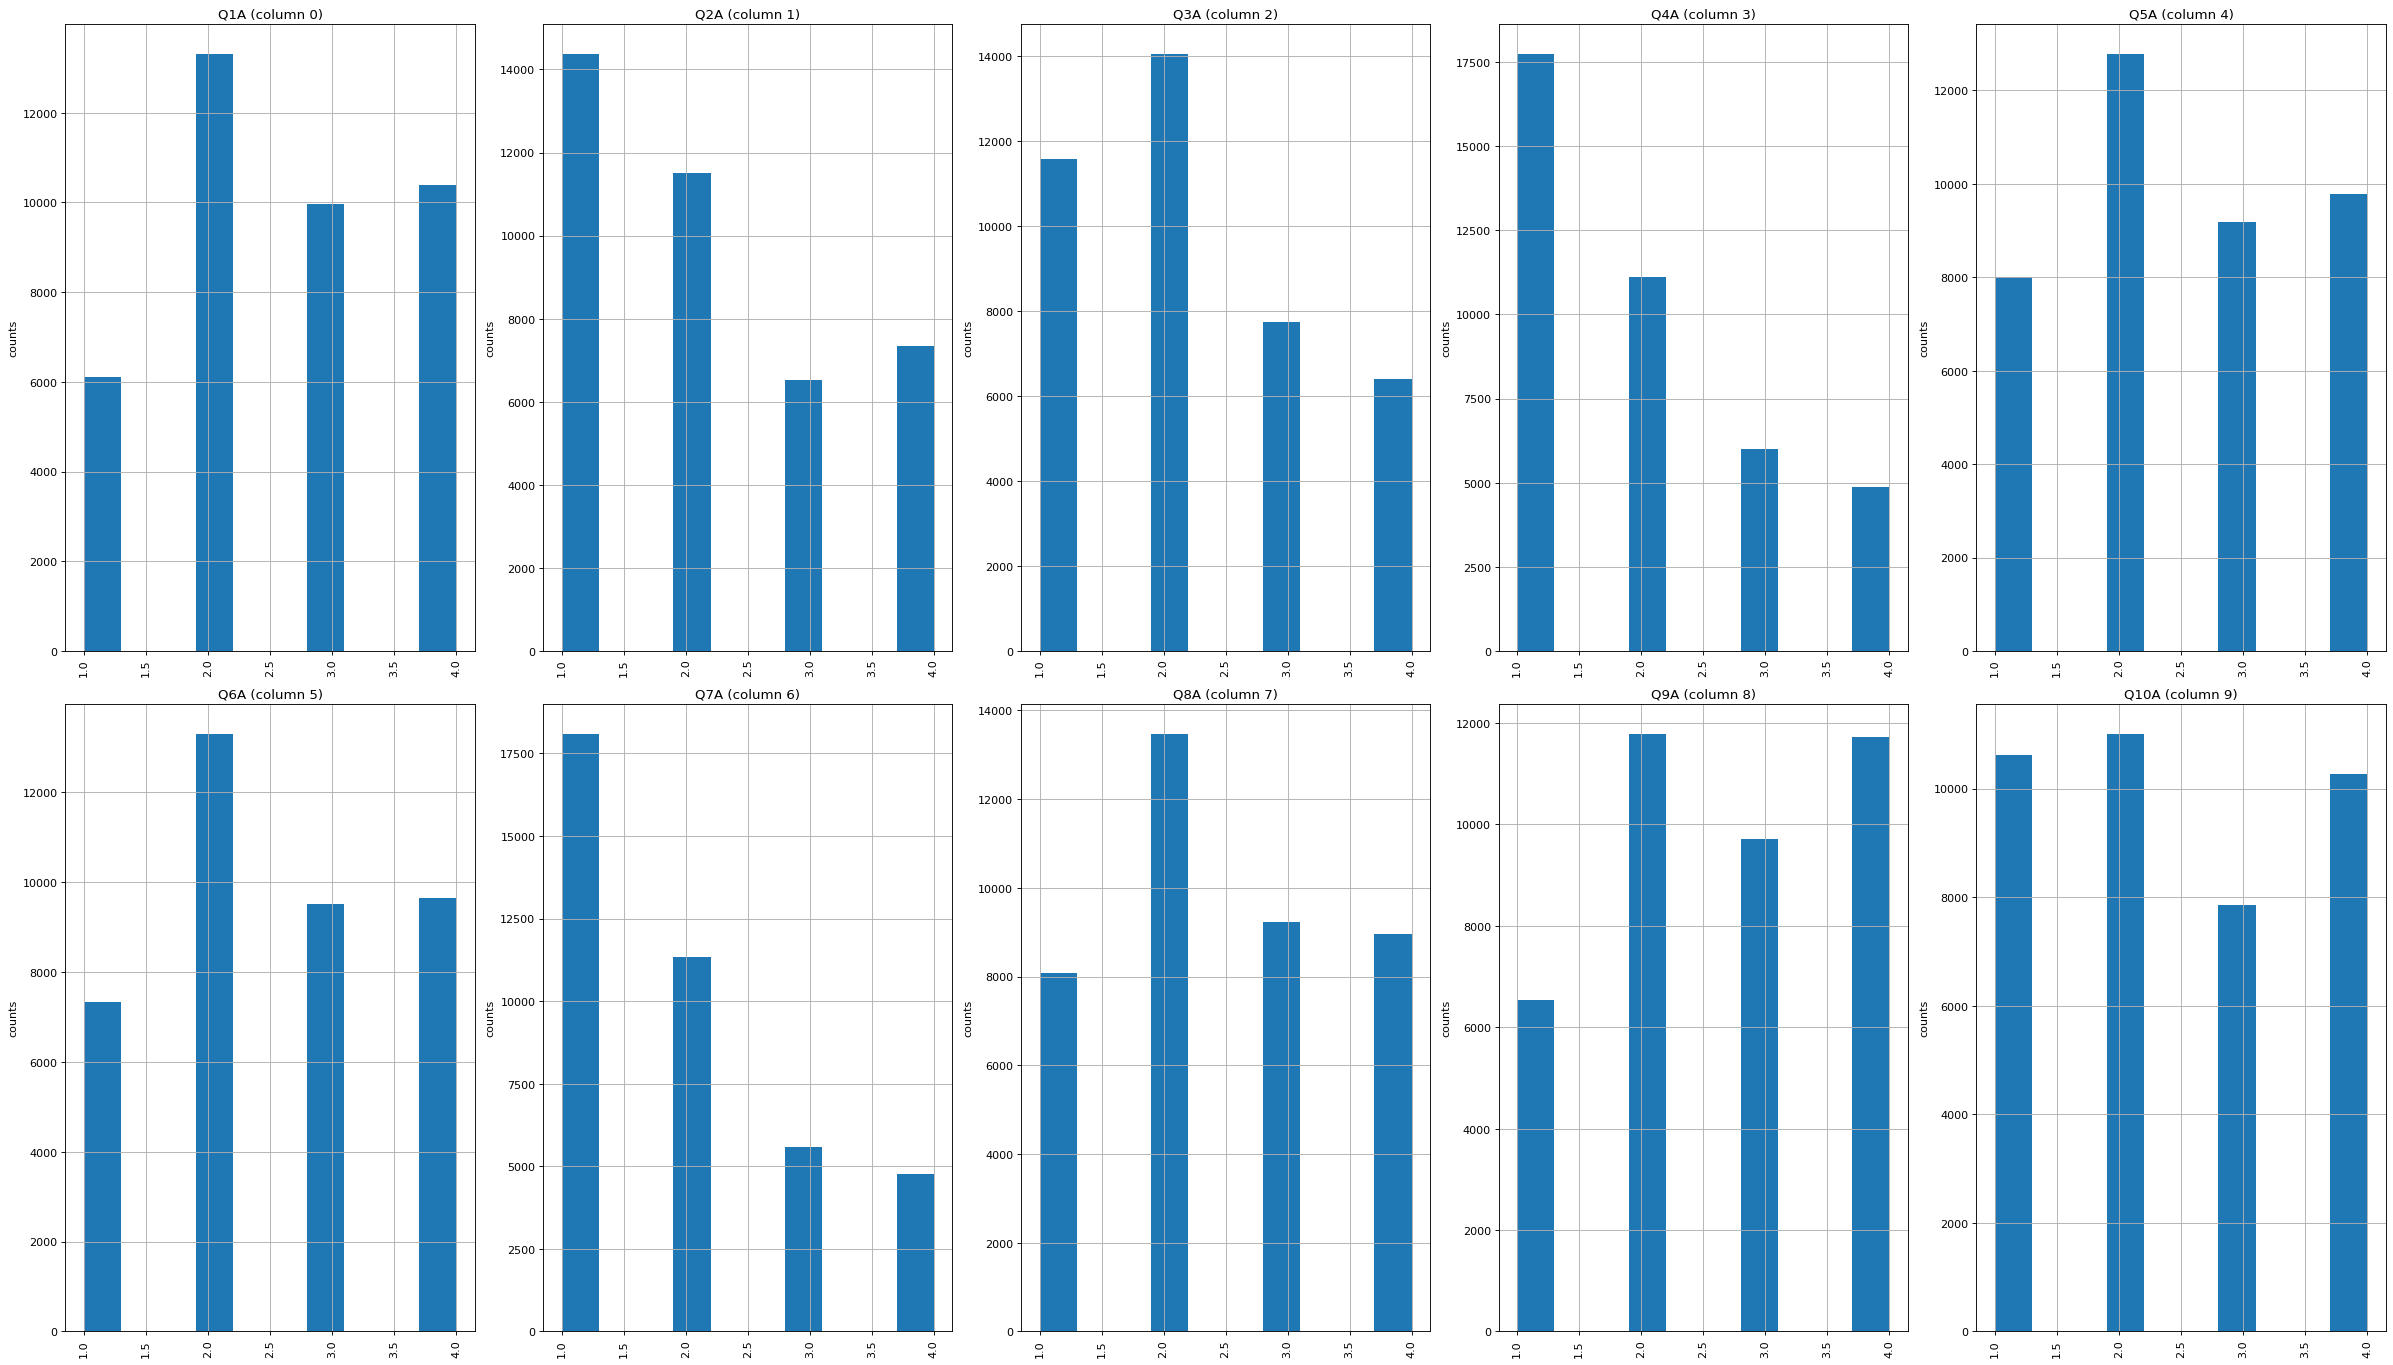

In [42]:
plotPerColumnDistribution(df, 10, 5)

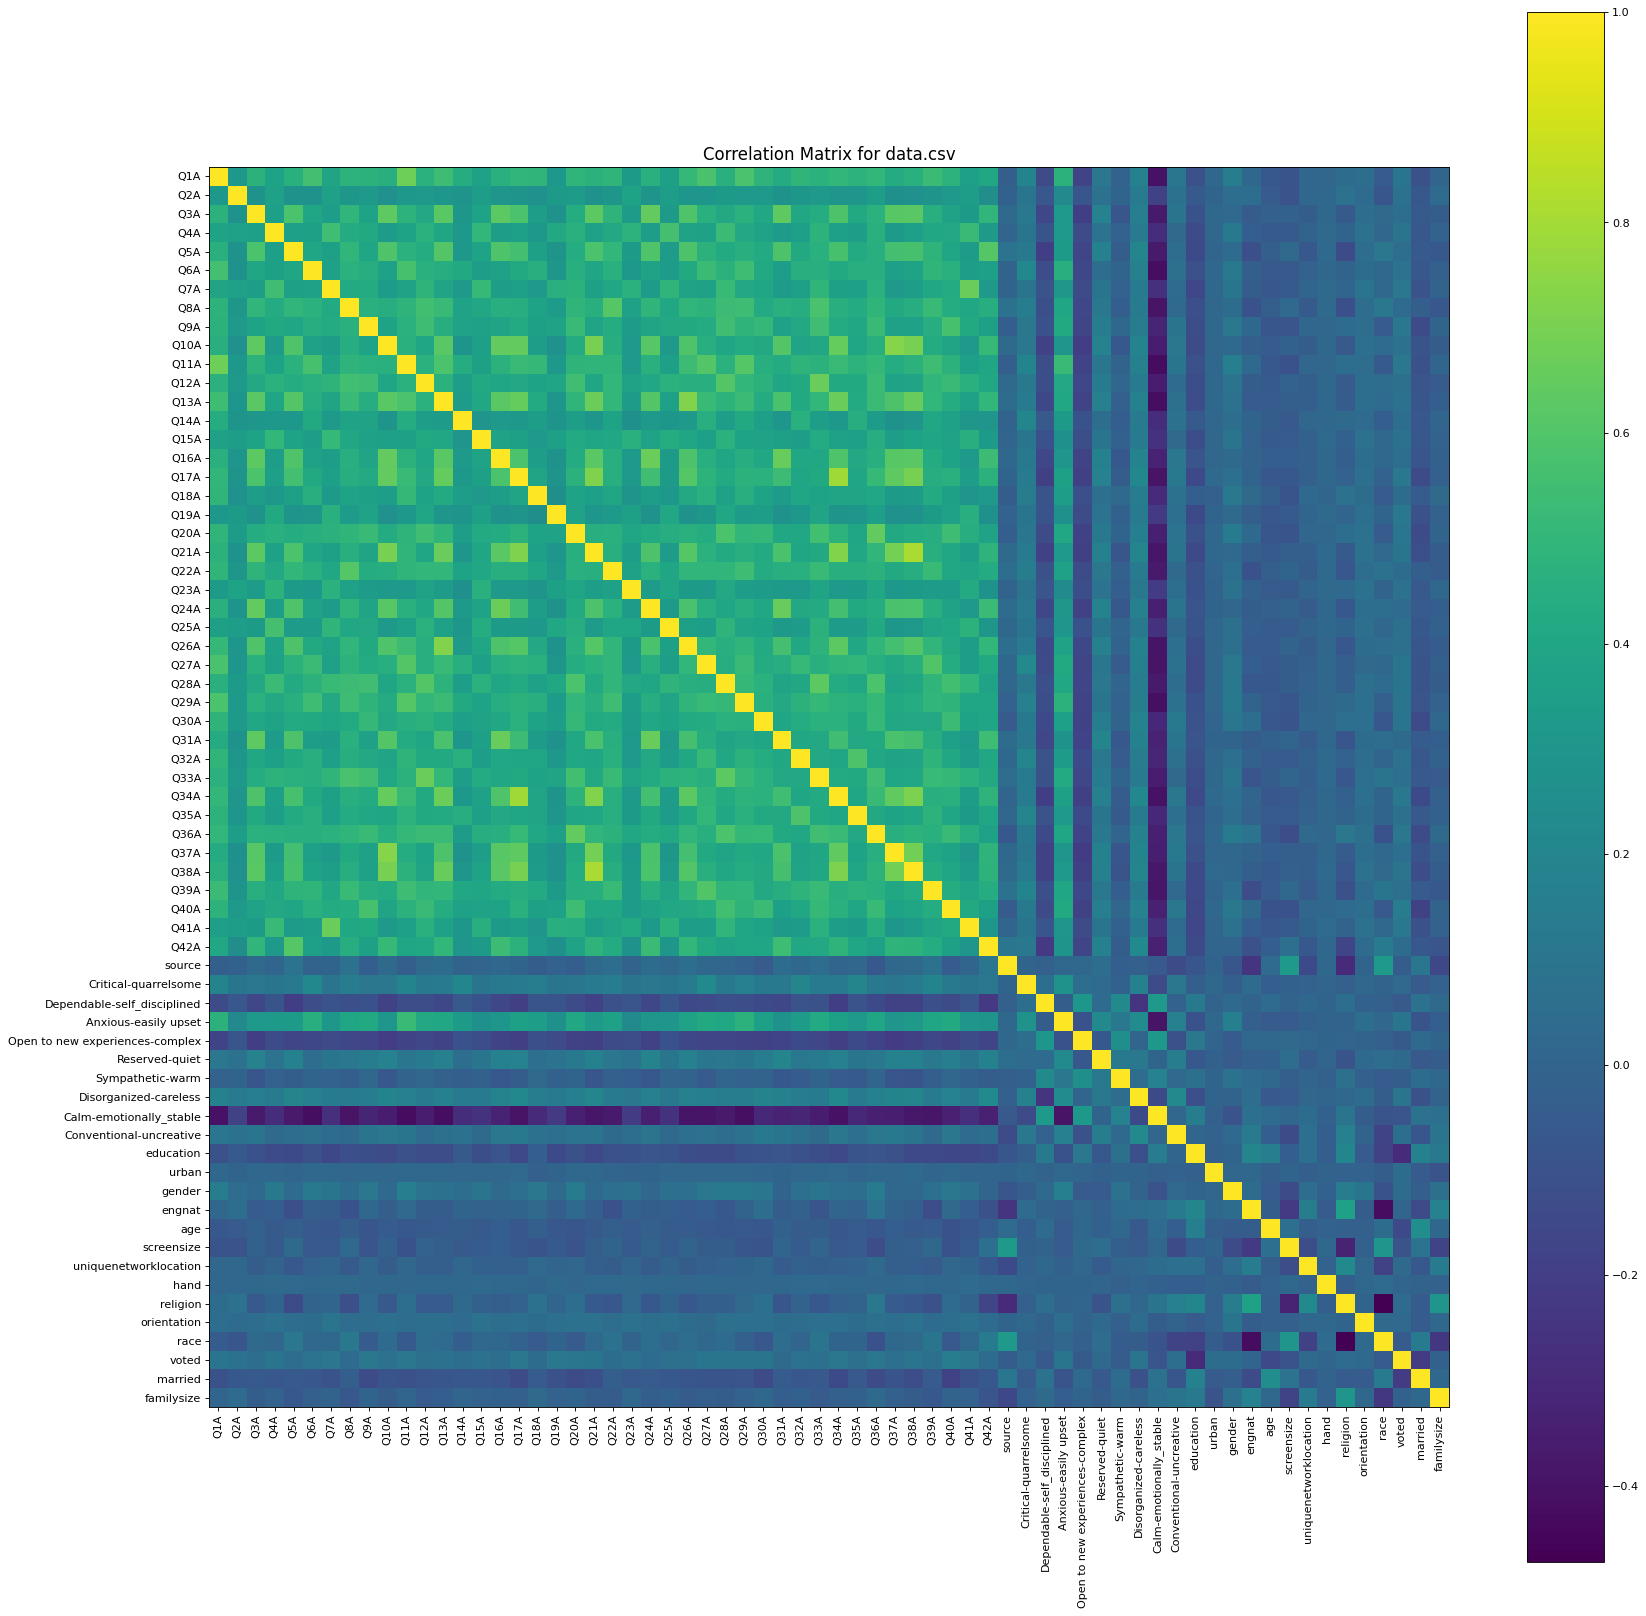

In [44]:
plotCorrelationMatrix(df, 25)

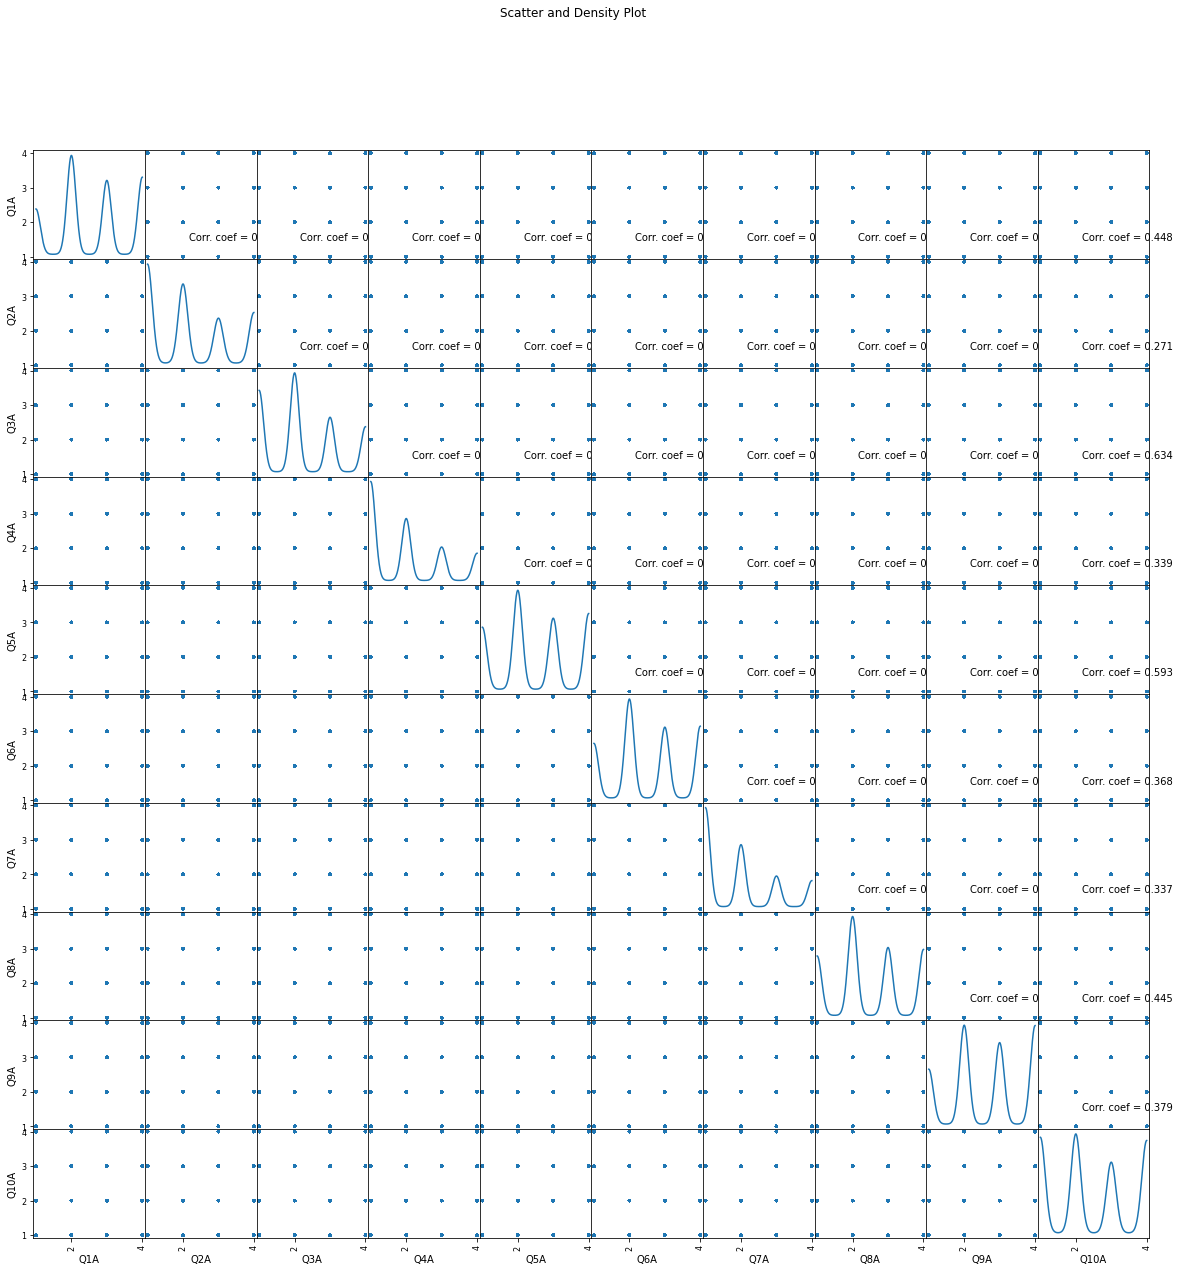

In [45]:
plotScatterMatrix(df, 20, 10)